In [2]:
import pandas as pd #for data reading and manupulation
import numpy as np # for data manupulation
import matplotlib.pyplot as plt # for data Visualization
import seaborn as sns # for data Visualization
%matplotlib inline
from sklearn.preprocessing import StandardScaler # for data scaling
from sklearn.decomposition import PCA # for dimentionality  reduction
from sklearn.cluster import KMeans # for clustering

In [3]:
sns.set_style()

In [4]:
train = pd.read_excel('train_ticket.xlsx')
test = pd.read_excel('test_ticket.xlsx')

In [5]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


## checking through the datatype

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
Airline            10683 non-null object
Date_of_Journey    10683 non-null object
Source             10683 non-null object
Destination        10683 non-null object
Route              10682 non-null object
Dep_Time           10683 non-null object
Arrival_Time       10683 non-null object
Duration           10683 non-null object
Total_Stops        10682 non-null object
Additional_Info    10683 non-null object
Price              10683 non-null int64
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


## explanatory analysis

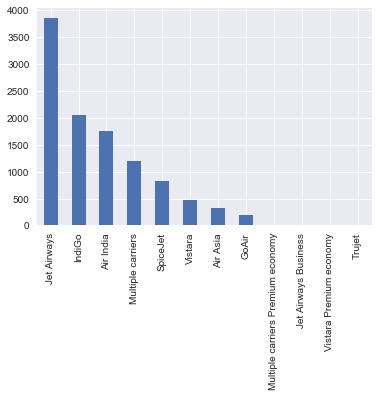

In [8]:
train['Airline'].value_counts().plot(kind='bar')

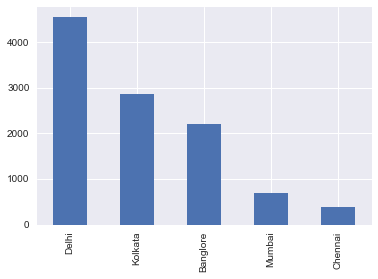

In [9]:
train['Source'].value_counts().plot(kind='bar')

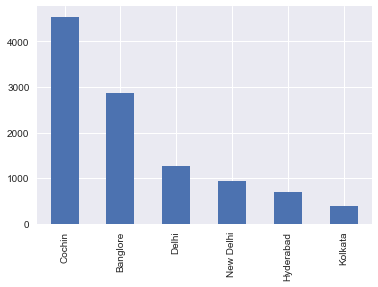

In [10]:
train['Destination'].value_counts().plot(kind='bar')

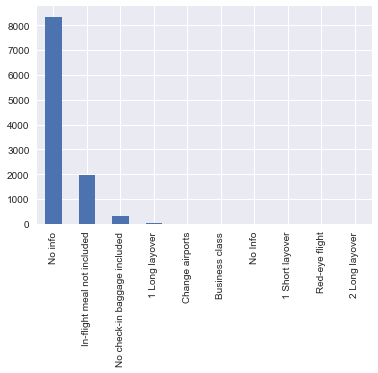

In [11]:
train['Additional_Info'].value_counts().plot(kind='bar')

In [12]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

## datetime datatypes

I have to clean both train and test object at a time for save my time 

In [13]:
train['Date_of_Journey'] = pd.to_datetime(train['Date_of_Journey'], infer_datetime_format=True)
test['Date_of_Journey'] = pd.to_datetime(test['Date_of_Journey'], infer_datetime_format=True)

In [14]:
train['year_of_journey'] = train['Date_of_Journey'].dt.year
train['days_of_journey'] = train['Date_of_Journey'].dt.dayofweek
train['month_of_journey'] = train['Date_of_Journey'].dt.month

In [15]:
test['year_of_journey'] = test['Date_of_Journey'].dt.year
test['days_of_journey'] = test['Date_of_Journey'].dt.dayofweek
test['month_of_journey'] = test['Date_of_Journey'].dt.month

In [16]:
# converting DEP_Time to minutes
train["Dep_Time"] = train["Dep_Time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
test["Dep_Time"] = test["Dep_Time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

## dealing with duration and arrival time

The error has to be split for better preprocessing of both columns

In [17]:
# new data frame with split value columns 
new = train["Duration"].str.split(" ", n = 1, expand = True) 

In [18]:
train['Duration_hour'] = new[0]

In [19]:
train['Duration_minute'] = new[1]

In [20]:
new_test = test["Duration"].str.split(" ", n = 1, expand = True) 
test["Duration_hour"] = new_test[0]
test["Duration_minute"] = new_test[1]

In [21]:
new1 = train["Arrival_Time"].str.split(" ", n = 1, expand =True) 

In [22]:
train['Arrival_time'] = new1[0]
train['Arrival_date'] = new1[1]

In [23]:
train['Arrival_time'] = train['Arrival_time'].astype('object')

In [24]:
train['Arrival_date'] = train['Arrival_date'].astype('object')

In [25]:
train["Arrival_time"] = train["Arrival_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [26]:
new1_test = test["Arrival_Time"].str.split(" ", n = 1, expand =True) 
test['Arrival_time'] = new1_test[0]
test['Arrival_date'] = new1_test[1]

In [27]:
test['Arrival_time'] = test['Arrival_time'].astype('object')
test['Arrival_date'] = test['Arrival_date'].astype('object')

In [28]:
test["Arrival_time"] = test["Arrival_time"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

I have been able to clean the Arrival Time to minutes both training and test set

In [29]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,2h,50m,70,22 Mar
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,7h,25m,795,None
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19h,None,265,10 Jun
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,5h,25m,1410,None
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,4h,45m,1295,None


Now to clean duration minute

In [30]:
train['Duration_hour'] = train['Duration_hour'].astype('object')
train['Duration_minute'] = train['Duration_minute'].astype('object')
# for test data
test['Duration_hour'] = test['Duration_hour'].astype('object')
test['Duration_minute'] = test['Duration_minute'].astype('object')

In [31]:
train['Duration_hour'] = train['Duration_hour'].replace({'2h':'02', '7h':'07', '19h':'19', '5h':'05', '4h':'04', '15h':'15', '21h':'21', '25h':'25'
                                , '13h':'13', '12h':'12',
       '26h':'26', '22h':'22', '23h':'23', '20h':'20', '10h':'10', '6h':'06', '11h':'11', '8h':'08', '16h':'16', '3h':'03',
       '27h':'27', '1h':'01', '14h':'14', '9h':'09', '18h':'18', '17h':'17', '24h':"24", '30h':"30", '28h':"28", '29h':"29",
       '37h':"37", '34h':"34", '38h':"38", '35h':"35", '36h':"36", '47h':"47", '33h':"33", '32h':"32", '31h':"31",
       '42h':"42", '39h':"39", '5m':"05", '41h':"41", '40h':"40"})

In [32]:
train['Duration_minute'] = train['Duration_minute'].replace({'50m':"50", '25m':"25", None:'00', '45m':"45", '30m':"30", '5m':"05", '15m':"15", '35m':"35", '10m':"10", 
                                  '20m':"20",
                                '55m':"55", '40m':"40"})

In [33]:
test['Duration_hour'] = test['Duration_hour'].replace({'10h':'10', '4h':'04', '23h':'23', '13h':'13', '2h':'02', '18h':'18', '15h':'15', '5h':'05', '6h':'06', '28h':'28',
                                                    '9h':'09','17h':'17','12h':'12', '14h':'14', '11h':'11', '25h':'25', '19h':'19', '7h':'07', '3h':'03', '1h':'01',
                                                      '27h':'27', '26h':'26', '8h':'08', '21h':'21', '16h':'16', '22h':'22', '33h':'33', '24h':'24', '38h':'38', '20h':'20',
                                                      '35h':'35', '31h':'31', '34h':'34', '29h':'29', '30h':'30', '37h':'37', '36h':'36', '39h':'39', '32h':'32',
                                                      '40h':'40', '5m':'05'})

In [34]:
test['Duration_minute'] = test['Duration_minute'].replace({'55m':'55', None:'00', '45m':'45', '50m':'50', '20m':'20', '5m':'05', '15m':'15',
                                                          '40m':'40', '10m':'10', '35m':'35',
                                                          '30m':'30', '25m':'25'})

checking head DataFrame

In [35]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,02,50,70,22 Mar
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,07,25,795,None
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19,00,265,10 Jun
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,05,25,1410,None
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,04,45,1295,None


In [36]:
# concating
train['duration'] = train['Duration_hour'] + ':' + train['Duration_minute']
test['duration'] = test['Duration_hour'] + ':' + test['Duration_minute']

In [37]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,02,50,70,22 Mar,02:50
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,07,25,795,None,07:25
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19,00,265,10 Jun,19:00
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,05,25,1410,None,05:25
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,04,45,1295,None,04:45


In [38]:
train["duration"] = train["duration"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))
test["duration"] = test["duration"].str.split(':').apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [39]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Duration_hour,Duration_minute,Arrival_time,Arrival_date,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,01:10 22 Mar,2h 50m,non-stop,No info,3897,2019,6,3,02,50,70,22 Mar,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,13:15,7h 25m,2 stops,No info,7662,2019,2,5,07,25,795,None,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,04:25 10 Jun,19h,2 stops,No info,13882,2019,6,6,19,00,265,10 Jun,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,23:30,5h 25m,1 stop,No info,6218,2019,6,5,05,25,1410,None,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,21:35,4h 45m,1 stop,No info,13302,2019,4,3,04,45,1295,None,285


Cleaning the data into minute

In [40]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
Airline             10683 non-null object
Date_of_Journey     10683 non-null datetime64[ns]
Source              10683 non-null object
Destination         10683 non-null object
Route               10682 non-null object
Dep_Time            10683 non-null int64
Arrival_Time        10683 non-null object
Duration            10683 non-null object
Total_Stops         10682 non-null object
Additional_Info     10683 non-null object
Price               10683 non-null int64
year_of_journey     10683 non-null int64
days_of_journey     10683 non-null int64
month_of_journey    10683 non-null int64
Duration_hour       10683 non-null object
Duration_minute     10683 non-null object
Arrival_time        10683 non-null int64
Arrival_date        4335 non-null object
duration            10683 non-null int64
dtypes: datetime64[ns](1), int64(7), object(11)
memory usage: 1.5+ MB


## droping uneccessary column

In [41]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'year_of_journey', 'days_of_journey',
       'month_of_journey', 'Duration_hour', 'Duration_minute', 'Arrival_time',
       'Arrival_date', 'duration'],
      dtype='object')

In [42]:
train.drop(['Arrival_date','Arrival_Time', 'Duration','Duration_hour', 'Duration_minute'], axis=1, inplace=True)

In [43]:
test.drop(['Arrival_date','Arrival_Time', 'Duration','Duration_hour', 'Duration_minute'], axis=1, inplace=True)

## checking the clean data

In [44]:
# import the data to my csv file
#train.to_csv('India_flight_train.csv', index=False)#
#test.to_csv('India_flight_test.csv', index=False)

## data exploration

In [45]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,non-stop,No info,3897,2019,6,3,70,170
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,2 stops,No info,7662,2019,2,5,795,445
2,Jet Airways,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,2 stops,No info,13882,2019,6,6,265,1140
3,IndiGo,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,1 stop,No info,6218,2019,6,5,1410,325
4,IndiGo,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,1 stop,No info,13302,2019,4,3,1295,285


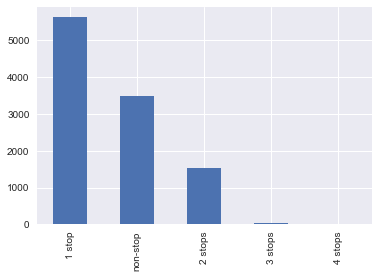

In [46]:
train['Total_Stops'].value_counts().plot(kind='bar')

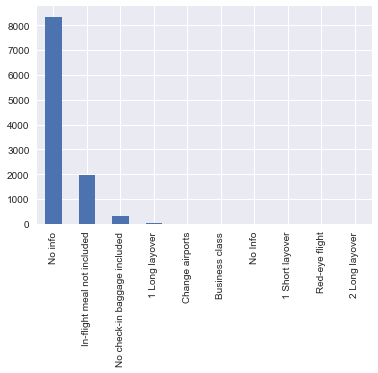

In [47]:
train['Additional_Info'].value_counts().plot(kind='bar')

In [48]:
train['Additional_Info'].value_counts()

No info                         8345
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [49]:
# Aditional info has To be Argumented
train['Additional_Info'] = train['Additional_Info'].replace({'No Info':'No info'})

In [50]:
test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Business class                     1
Change airports                    1
1 Long layover                     1
Name: Additional_Info, dtype: int64

In [51]:
test['Additional_Info'] = [1 if values == 'No info' else 0 for values in test['Additional_Info']]

In [52]:
# list comprehension to argument
train['Additional_Info'] = [1 if values == 'No info' else 0 for values in train['Additional_Info']]

In [53]:
train['Additional_Info'].value_counts()

1    8348
0    2335
Name: Additional_Info, dtype: int64

In [54]:
#train['Price'].describe()

## digging insight Explanatory Data Analysis

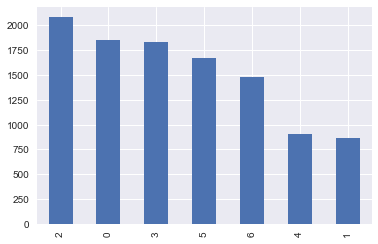

In [55]:
train['days_of_journey'].value_counts().plot(kind='bar')

In [56]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'year_of_journey', 'days_of_journey', 'month_of_journey',
       'Arrival_time', 'duration'],
      dtype='object')

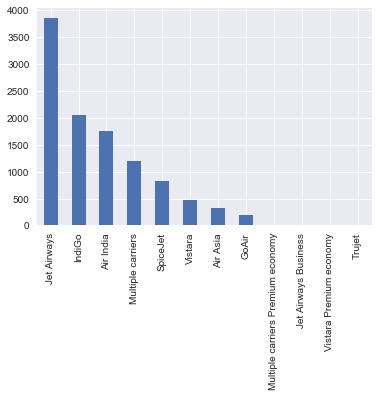

In [57]:
train['Airline'].value_counts().plot(kind='bar')

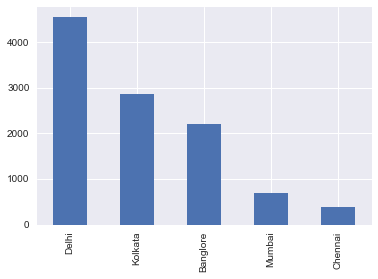

In [58]:
train['Source'].value_counts().plot(kind='bar')

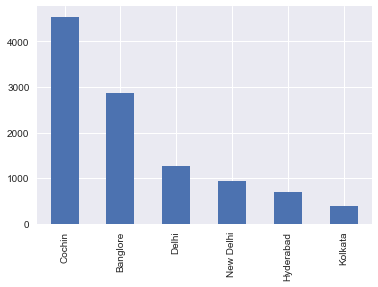

In [59]:
train['Destination'].value_counts().plot(kind='bar')

In [60]:
#train['Route'].value_counts()

## using crosstab

In [61]:
#pd.crosstab(train['days_of_journey'], train['Airline'], margins=True)

In [62]:
pd.crosstab(train['Airline'],train['days_of_journey'], margins=True)

days_of_journey,0,1,2,3,4,5,6,All
Airline,,,,,,,,
Air Asia,50,26,59,47,32,56,49,319
Air India,270,162,348,285,178,249,260,1752
GoAir,35,10,38,22,21,33,35,194
IndiGo,349,140,384,304,218,355,303,2053
Jet Airways,698,344,730,711,286,562,518,3849
Jet Airways Business,0,0,1,0,4,0,1,6
Multiple carriers,221,81,283,265,11,228,107,1196
Multiple carriers Premium economy,0,0,0,13,0,0,0,13
SpiceJet,147,67,138,122,109,123,112,818


In [63]:
pd.crosstab(train['Source'],train['Destination'], margins=True)

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,All
Source,,,,,,,
Banglore,0,0,1265,0,0,932,2197
Chennai,0,0,0,0,381,0,381
Delhi,0,4537,0,0,0,0,4537
Kolkata,2871,0,0,0,0,0,2871
Mumbai,0,0,0,697,0,0,697
All,2871,4537,1265,697,381,932,10683


In [64]:
pd.crosstab(train['Airline'],train['Destination'], margins=True)

Destination,Banglore,Cochin,Delhi,Hyderabad,Kolkata,New Delhi,All
Airline,,,,,,,
Air Asia,150,80,71,0,0,18,319
Air India,512,747,120,136,25,212,1752
GoAir,25,76,69,0,0,24,194
IndiGo,445,705,366,196,184,157,2053
Jet Airways,1256,1586,370,219,0,418,3849
Jet Airways Business,0,2,0,0,0,4,6
Multiple carriers,0,1196,0,0,0,0,1196
Multiple carriers Premium economy,0,13,0,0,0,0,13
SpiceJet,300,87,137,122,128,44,818


In [65]:
pd.crosstab(train['Airline'],train['Source'], margins=True)

Source,Banglore,Chennai,Delhi,Kolkata,Mumbai,All
Airline,,,,,,
Air Asia,89,0,80,150,0,319
Air India,332,25,747,512,136,1752
GoAir,93,0,76,25,0,194
IndiGo,523,184,705,445,196,2053
Jet Airways,788,0,1586,1256,219,3849
Jet Airways Business,4,0,2,0,0,6
Multiple carriers,0,0,1196,0,0,1196
Multiple carriers Premium economy,0,0,13,0,0,13
SpiceJet,181,128,87,300,122,818


In [66]:
#train.groupby('Airline')['Price'].plot(kind='bar')

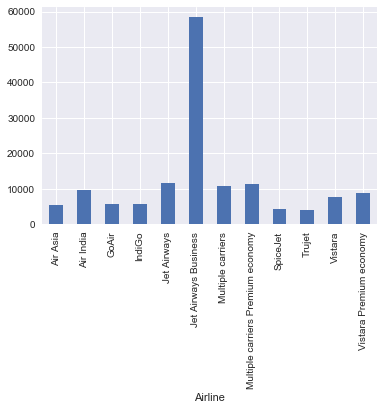

In [67]:
train.groupby('Airline')['Price'].mean().plot(kind='bar')

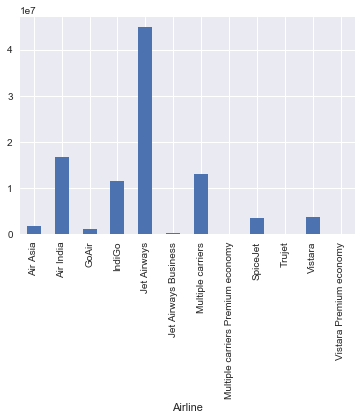

In [68]:
train.groupby('Airline')['Price'].sum().plot(kind='bar')

Cleaning the data

In [69]:
train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Total_Stops', 'Additional_Info', 'Price',
       'year_of_journey', 'days_of_journey', 'month_of_journey',
       'Arrival_time', 'duration'],
      dtype='object')

In [70]:
# list comprehension to argument
train['Total_Stops'] = [1 if values == 'non-stop' else 0 for values in train['Total_Stops']]

In [71]:
# list comprehension to argument
test['Total_Stops'] = [1 if values == 'non-stop' else 0 for values in test['Total_Stops']]

In [72]:
train['Airline'] = train['Airline'].astype('category')
# for test data
test['Airline'] = test['Airline'].astype('category')

In [73]:
train['Airline'] = train['Airline'].cat.codes
# for test data
test['Airline'] = test['Airline'].cat.codes

In [74]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,1,1,3897,2019,6,3,70,170
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,0,1,7662,2019,2,5,795,445
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,0,1,13882,2019,6,6,265,1140
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,0,1,6218,2019,6,5,1410,325
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,0,1,13302,2019,4,3,1295,285


In [75]:
train.corr()['Price']

Airline            -0.039520
Dep_Time            0.005485
Total_Stops        -0.613760
Additional_Info     0.022086
Price               1.000000
year_of_journey          NaN
days_of_journey     0.051613
month_of_journey   -0.103651
Arrival_time        0.020921
duration            0.506495
Name: Price, dtype: float64

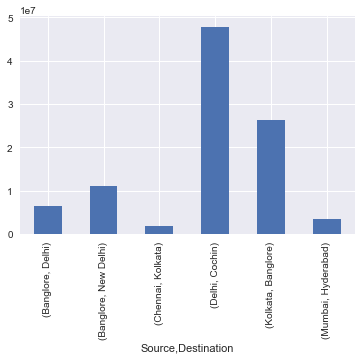

In [76]:
train.groupby(['Source', 'Destination'])['Price'].sum().plot(kind='bar')

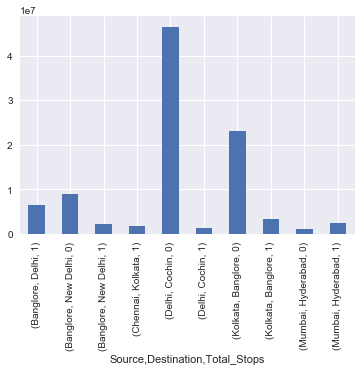

In [77]:
train.groupby(['Source', 'Destination', 'Total_Stops'])['Price'].sum().plot(kind='bar')

In [78]:
te = train.groupby(['Source', 'Destination', 'Total_Stops'])['Price'].agg(['mean'])

In [79]:
te.columns = ['mean_price_DST']

## Little Feature Engineering

In [80]:
train['Dep_Time'].describe()

count    10683.000000
mean       773.852382
std        344.964055
min         20.000000
25%        480.000000
50%        710.000000
75%       1085.000000
max       1435.000000
Name: Dep_Time, dtype: float64

In [81]:
train['Arrival_time'].describe()

count    10683.000000
mean       825.617336
std        409.324620
min          5.000000
25%        525.000000
50%        845.000000
75%       1155.000000
max       1435.000000
Name: Arrival_time, dtype: float64

In [82]:
train['duration'].describe()

count    10683.000000
mean       643.120846
std        507.835322
min         75.000000
25%        170.000000
50%        520.000000
75%        930.000000
max       2860.000000
Name: duration, dtype: float64

In [83]:
def convert_time(tim):
    if tim < 720:
        return 'AM'
    elif tim == 720:
        return 'NOON'
    else:
        return 'PM'

In [84]:
def convert_dur(dur):
    if dur < 1430:
        return 'fast'
    elif dur == 1430:
        return 'middle'
    else:
        return 'slow'

In [85]:
train['Time_Zone_Dep'] = train['Dep_Time'].apply(convert_time)

In [86]:
test['Time_Zone_Dep'] = test['Dep_Time'].apply(convert_time)

In [87]:
train['Time_Zone_Arr'] = train['Arrival_time'].apply(convert_time)
test['Time_Zone_Arr'] = test['Arrival_time'].apply(convert_time)

In [88]:
train['Time_Zone_Arr'] = train['Arrival_time'].apply(convert_time)
test['Time_Zone_Arr'] = test['Arrival_time'].apply(convert_time)

In [89]:
train['duration_len'] = train['duration'].apply(convert_dur)
test['duration_len'] = test['duration'].apply(convert_dur)

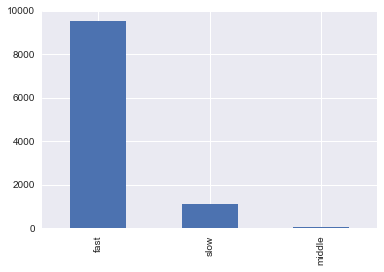

In [90]:
train['duration_len'].value_counts().plot(kind='bar')

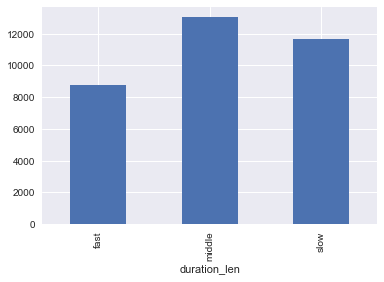

In [91]:
train.groupby('duration_len')['Price'].agg(np.mean).plot(kind='bar')

In [92]:
train.Destination.value_counts(), train.Source.value_counts()

(Cochin       4537
 Banglore     2871
 Delhi        1265
 New Delhi     932
 Hyderabad     697
 Kolkata       381
 Name: Destination, dtype: int64, Delhi       4537
 Kolkata     2871
 Banglore    2197
 Mumbai       697
 Chennai      381
 Name: Source, dtype: int64)

In [93]:
#def SD(sou, des):
    #if sou =='Banglore' and des == 'Delhi':
        #return 'Banglore-Delhi'
    #elif sou =='Banglore' and des == 'New Delhi':
        #return 'Banglore-New_Delhi'
    #elif sou == 'Chennai' and des == 'Kolkata':
        #return 'Chennai-Kolkata'
    #elif sou == 'Delhi' and des == 'Cochin':
        #return 'Delhi-Cochin'
    #elif sou == 'Kolkata' and des == 'Banglore':
        #return 'Kolkata-Banglore'
    #else:
        #return 'Mumbai-Hyderabad'

In [94]:
train['sou_des'] = train['Source'] + ' ' + train['Destination']

In [95]:
test['sou_des'] = test['Source'] + ' ' + test['Destination']

In [96]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration,Time_Zone_Dep,Time_Zone_Arr,duration_len,sou_des
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,1,1,3897,2019,6,3,70,170,PM,AM,fast,Banglore New Delhi
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,0,1,7662,2019,2,5,795,445,AM,PM,fast,Kolkata Banglore
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,0,1,13882,2019,6,6,265,1140,AM,AM,fast,Delhi Cochin
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,0,1,6218,2019,6,5,1410,325,PM,PM,fast,Kolkata Banglore
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,0,1,13302,2019,4,3,1295,285,PM,PM,fast,Banglore New Delhi


In [97]:
train.sou_des.value_counts()

Delhi Cochin          4537
Kolkata Banglore      2871
Banglore Delhi        1265
Banglore New Delhi     932
Mumbai Hyderabad       697
Chennai Kolkata        381
Name: sou_des, dtype: int64

converting each source and destination by air to distance

In [98]:
distance = {'Delhi Cochin':2081.78, 'Kolkata Banglore':1559, 'Banglore Delhi':1700, 'Mumbai Hyderabad':622,
      'Chennai Kolkata':1380, 'Banglore New Delhi':1700}

In [99]:
train['sou_des'] = train['sou_des'].map(distance)

In [100]:
test['sou_des'] = test['sou_des'].map(distance)

In [101]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,year_of_journey,days_of_journey,month_of_journey,Arrival_time,duration,Time_Zone_Dep,Time_Zone_Arr,duration_len,sou_des
0,3,2019-03-24,Banglore,New Delhi,BLR → DEL,1340,1,1,3897,2019,6,3,70,170,PM,AM,fast,1700.00
1,1,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,350,0,1,7662,2019,2,5,795,445,AM,PM,fast,1559.00
2,4,2019-06-09,Delhi,Cochin,DEL → LKO → BOM → COK,565,0,1,13882,2019,6,6,265,1140,AM,AM,fast,2081.78
3,3,2019-05-12,Kolkata,Banglore,CCU → NAG → BLR,1085,0,1,6218,2019,6,5,1410,325,PM,PM,fast,1559.00
4,3,2019-03-01,Banglore,New Delhi,BLR → NAG → DEL,1010,0,1,13302,2019,4,3,1295,285,PM,PM,fast,1700.00


In [102]:
train.corr()['Price']

Airline            -0.039520
Dep_Time            0.005485
Total_Stops        -0.613760
Additional_Info     0.022086
Price               1.000000
year_of_journey          NaN
days_of_journey     0.051613
month_of_journey   -0.103651
Arrival_time        0.020921
duration            0.506495
sou_des             0.321925
Name: Price, dtype: float64

In [103]:
dur_len = {'fast':2, 'middle':1, 'slow':0}

In [104]:
train['duration_len'] = train['duration_len'].map(dur_len)
test['duration_len'] = test['duration_len'].map(dur_len)

In [105]:
pd.crosstab(train['Time_Zone_Dep'], train['Time_Zone_Arr'], margins=True)

Time_Zone_Arr,AM,NOON,PM,All
Time_Zone_Dep,,,,
AM,2159,70,3148,5377
NOON,31,0,67,98
PM,1898,65,3245,5208
All,4088,135,6460,10683


In [106]:
train['time_zone'] = train['Time_Zone_Dep'] + ' ' + train['Time_Zone_Arr']
test['time_zone'] = test['Time_Zone_Dep'] + ' ' + test['Time_Zone_Arr']

In [107]:
#train['Time_Zone_Dep'] = train['Time_Zone_Dep'].astype('category')
#test['Time_Zone_Dep'] = test['Time_Zone_Dep'].astype('category')

In [108]:
#train['Time_Zone_Dep'] = train['Time_Zone_Dep'].cat.codes
#test['Time_Zone_Dep'] = test['Time_Zone_Dep'].cat.codes

In [109]:
#train['time_zone'] = train['time_zone'].astype('category')
#test['time_zone'] = test['time_zone'].astype('category')

In [110]:
#train['time_zone'] = train['time_zone'].cat.codes
#test['time_zone'] = test['time_zone'].cat.codes

In [111]:
#arr = {'AM':1, 'NOON':2, 'PM':3}

In [112]:
#train['Time_Zone_Arr'] = train['Time_Zone_Arr'].map(arr)

In [113]:
#test['Time_Zone_Arr'] = test['Time_Zone_Arr'].map(arr)

In [114]:
train['Route'] = train['Route'].astype('category')
test['Route'] = test['Route'].astype('category')

In [115]:
train['Route'] = train['Route'].cat.codes
test['Route'] = test['Route'].cat.codes

In [164]:
train  = pd.get_dummies(data=train)

In [165]:
test = pd.get_dummies(data=test)

In [118]:
#train['Source'] = train['Source'].astype('category')
#test['Source'] = test['Source'].astype('category')

In [119]:
#train['Source'] = train['Source'].cat.codes
#test['Source'] = test['Source'].cat.codes

In [120]:
#train['Destination'] = train['Destination'].astype('category')
#test['Destination'] = test['Destination'].astype('category')

In [121]:
#train['Destination'] = train['Destination'].cat.codes
#test['Destination'] = test['Destination'].cat.codes

## droping features 

In [166]:
train.shape

(10683, 46)

In [167]:
test.shape

(2671, 45)

In [168]:
train.corr()['Price']

Airline                 -0.039520
Route                    0.164183
Dep_Time                 0.005485
Total_Stops             -0.613760
Additional_Info          0.022086
Price                    1.000000
days_of_journey          0.051613
month_of_journey        -0.103651
Arrival_time             0.020921
duration                 0.506495
duration_len            -0.197802
sou_des                  0.321925
sd                       0.496832
ro_mo_stop              -0.439029
gr                       0.496832
avg_dur_arr              0.381140
arr_dep                  0.000850
rou_mo                   0.132574
d_m                      0.439614
To_Re                   -0.472800
r_i_m                    0.372806
Source_Banglore         -0.118026
Source_Chennai          -0.179216
Source_Delhi             0.270619
Source_Kolkata           0.009377
Source_Mumbai           -0.230745
Destination_Banglore     0.009377
Destination_Cochin       0.270619
Destination_Delhi       -0.313401
Destination_Hy

In [125]:
#train.drop(['Date_of_Journey','Source', 'Destination', 'year_of_journey', 'days_of_journey','Time_Zone_Dep', 'Time_Zone_Arr', 'time_zone'], axis=1, inplace=True)

In [126]:
train.drop(['Date_of_Journey','year_of_journey'], axis=1, inplace=True)
test.drop(['Date_of_Journey','year_of_journey'], axis=1, inplace=True)

In [127]:
## for test set
#test.drop(['Date_of_Journey','Source', 'Destination', 'year_of_journey', 'days_of_journey','Time_Zone_Dep', 'Time_Zone_Arr', 'time_zone'], axis=1, inplace=True)

In [169]:
train.head()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,Price,days_of_journey,month_of_journey,Arrival_time,duration,...,Time_Zone_Arr_NOON,Time_Zone_Arr_PM,time_zone_AM AM,time_zone_AM NOON,time_zone_AM PM,time_zone_NOON AM,time_zone_NOON PM,time_zone_PM AM,time_zone_PM NOON,time_zone_PM PM
0,3,18,1.641255,1,1,3897,6,3,-1.846096,170,...,0,0,0,0,0,0,0,1,0,0
1,1,84,-1.228743,0,1,7662,2,5,-0.074803,445,...,0,1,0,0,1,0,0,0,0,0
2,4,118,-0.605461,0,1,13882,6,6,-1.369680,1140,...,0,0,1,0,0,0,0,0,0,0
3,3,91,0.902013,0,1,6218,6,5,1.427742,325,...,0,1,0,0,0,0,0,0,0,1
4,3,29,0.684589,0,1,13302,4,3,1.146778,285,...,0,1,0,0,0,0,0,0,0,1


In [170]:
test.head()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,days_of_journey,month_of_journey,Arrival_time,duration,duration_len,...,Time_Zone_Arr_NOON,Time_Zone_Arr_PM,time_zone_AM AM,time_zone_AM NOON,time_zone_AM PM,time_zone_NOON AM,time_zone_NOON PM,time_zone_PM AM,time_zone_PM NOON,time_zone_PM PM
0,4,76,0.788529,0,1,3,6,-1.366994,655,2,...,0,0,0,0,0,0,0,1,0,0
1,3,65,-1.176215,0,1,3,12,-0.522537,240,2,...,0,0,1,0,0,0,0,0,0,0
2,4,76,1.096437,0,0,1,5,0.714414,1425,2,...,0,1,0,0,0,0,0,0,0,1
3,6,76,-0.882969,0,1,1,5,0.999864,780,2,...,0,1,0,0,1,0,0,0,0,0
4,0,16,1.917524,1,1,0,6,-1.604869,170,2,...,0,0,0,0,0,0,0,1,0,0


In [171]:
train['sd'] = train['sou_des'] * train['duration']

In [172]:
test['sd'] = test['sou_des'] * train['duration']

In [173]:
train['ro_mo_stop'] = (train['Route'] * train['Total_Stops']) / train['month_of_journey']

In [174]:
test['ro_mo_stop'] = (test['Route'] * test['Total_Stops']) / test['month_of_journey']

droping low correlation features and unneccesary object datatype

In [175]:
## increasing figure 
sns.set(rc={'figure.figsize':(10,5)})

In [135]:
train['gr'] = train['sou_des'] * train['duration']
test['gr'] = test['sou_des'] * test['duration']

In [136]:
train['avg_dur_arr'] = (train['Arrival_time'] * train['duration']) *100
test['avg_dur_arr'] = (test['Arrival_time'] * test['duration']) *100

In [137]:
train['arr_dep'] = (train['Arrival_time'] - train['Dep_Time']) * train['duration_len']
test['arr_dep'] = (test['Arrival_time'] - test['Dep_Time']) * test['duration_len']

In [138]:
train['rou_mo'] = train['month_of_journey'] * train['Route']
test['rou_mo'] = test['month_of_journey'] * test['Route']

In [139]:
train['d_m'] = train['duration'] * train['month_of_journey']
test['d_m'] = test['duration'] * test['month_of_journey']

In [140]:
train['To_Re'] = train['Total_Stops'] * train['Route']
test['To_Re'] = test['Total_Stops'] * test['Route']

In [141]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Total_Stops,Additional_Info,Price,days_of_journey,month_of_journey,...,sou_des,time_zone,sd,ro_mo_stop,gr,avg_dur_arr,arr_dep,rou_mo,d_m,To_Re
0,3,Banglore,New Delhi,18,1340,1,1,3897,6,3,...,1700.00,PM AM,289000.0,6.0,289000.0,1190000,-2540,54,510,18
1,1,Kolkata,Banglore,84,350,0,1,7662,2,5,...,1559.00,AM PM,693755.0,0.0,693755.0,35377500,890,420,2225,0
2,4,Delhi,Cochin,118,565,0,1,13882,6,6,...,2081.78,AM AM,2373229.2,0.0,2373229.2,30210000,-600,708,6840,0
3,3,Kolkata,Banglore,91,1085,0,1,6218,6,5,...,1559.00,PM PM,506675.0,0.0,506675.0,45825000,650,455,1625,0
4,3,Banglore,New Delhi,29,1010,0,1,13302,4,3,...,1700.00,PM PM,484500.0,0.0,484500.0,36907500,570,87,855,0


In [142]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 24 columns):
Airline             2671 non-null int8
Source              2671 non-null object
Destination         2671 non-null object
Route               2671 non-null int8
Dep_Time            2671 non-null int64
Total_Stops         2671 non-null int64
Additional_Info     2671 non-null int64
days_of_journey     2671 non-null int64
month_of_journey    2671 non-null int64
Arrival_time        2671 non-null int64
duration            2671 non-null int64
Time_Zone_Dep       2671 non-null object
Time_Zone_Arr       2671 non-null object
duration_len        2671 non-null int64
sou_des             2671 non-null float64
time_zone           2671 non-null object
sd                  2671 non-null float64
ro_mo_stop          2671 non-null float64
gr                  2671 non-null float64
avg_dur_arr         2671 non-null int64
arr_dep             2671 non-null int64
rou_mo              2671 non-null int64
d_

In [143]:
train['r_i_m'] = (train['Route'] * train['month_of_journey'] * train['duration'])
test['r_i_m'] = (test['Route'] * test['month_of_journey'] * test['duration'])

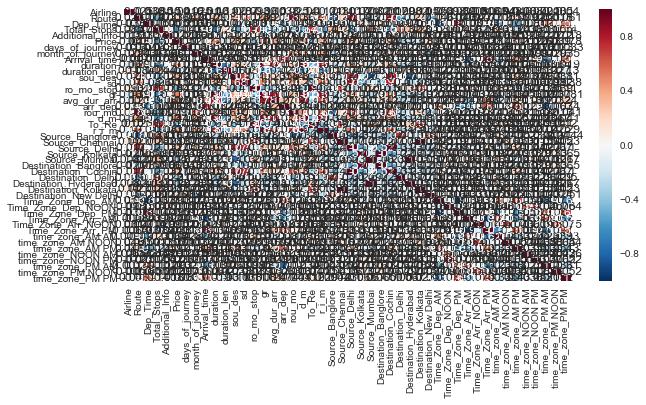

In [176]:
sns.heatmap(train.corr(), annot=True)

## importing data for modelling on kaggle

In [177]:
train.shape

(10683, 46)

In [178]:
test.shape

(2671, 45)

In [179]:
train.describe()

,Airline,Route,Dep_Time,Total_Stops,Additional_Info,Price,days_of_journey,month_of_journey,Arrival_time,duration,...,Time_Zone_Arr_NOON,Time_Zone_Arr_PM,time_zone_AM AM,time_zone_AM NOON,time_zone_AM PM,time_zone_NOON AM,time_zone_NOON PM,time_zone_PM AM,time_zone_PM NOON,time_zone_PM PM
count,10683.000000,10683.000000,1.068300e+04,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,1.068300e+04,10683.000000,...,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000,10683.000000
mean,3.965927,74.813067,-2.001010e-16,0.326781,0.781428,9087.064121,2.934850,4.708602,2.817699e-16,643.120846,...,0.012637,0.604699,0.202097,0.006552,0.294674,0.002902,0.006272,0.177665,0.006084,0.303754
std,2.352155,36.734645,1.000047e+00,0.469058,0.413297,4611.359167,2.006698,1.164357,1.000047e+00,507.835322,...,0.111707,0.488938,0.401583,0.080685,0.455917,0.053793,0.078949,0.382249,0.077769,0.459899
min,0.000000,-1.000000,-2.185409e+00,0.000000,0.000000,1759.000000,0.000000,3.000000,-2.004902e+00,75.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,48.000000,-8.518747e-01,0.000000,1.000000,5277.000000,1.000000,3.000000,-7.344572e-01,170.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,73.000000,-1.851073e-01,0.000000,1.000000,8372.000000,3.000000,5.000000,4.735501e-02,520.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,104.000000,9.020133e-01,1.000000,1.000000,12373.000000,5.000000,6.000000,8.047356e-01,930.000000,...,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,11.000000,127.000000,1.916659e+00,1.000000,1.000000,79512.000000,6.000000,6.000000,1.488821e+00,2860.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [148]:
scale = StandardScaler()

In [149]:
import warnings
warnings.filterwarnings("ignore")

In [154]:
from scipy.stats import boxcox

In [180]:
train.corr()['Price']

Airline                 -0.039520
Route                    0.164183
Dep_Time                 0.005485
Total_Stops             -0.613760
Additional_Info          0.022086
Price                    1.000000
days_of_journey          0.051613
month_of_journey        -0.103651
Arrival_time             0.020921
duration                 0.506495
duration_len            -0.197802
sou_des                  0.321925
sd                       0.151535
ro_mo_stop              -0.439029
gr                       0.496832
avg_dur_arr              0.381140
arr_dep                  0.000850
rou_mo                   0.132574
d_m                      0.439614
To_Re                   -0.472800
r_i_m                    0.372806
Source_Banglore         -0.118026
Source_Chennai          -0.179216
Source_Delhi             0.270619
Source_Kolkata           0.009377
Source_Mumbai           -0.230745
Destination_Banglore     0.009377
Destination_Cochin       0.270619
Destination_Delhi       -0.313401
Destination_Hy

## modelling

In [181]:
X = train.drop('Price', axis=1)
y = train['Price']

In [182]:
from sklearn.linear_model import Ridge

In [183]:
from sklearn.tree import DecisionTreeRegressor

In [184]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, BaggingRegressor

In [160]:
#train.to_csv('wedT.csv', index=False)
#test.to_csv('wedTe.csv', index=False)

In [227]:
model = RandomForestRegressor(n_estimators=390, criterion='mse', max_depth=20, min_samples_split=2,min_samples_leaf=1 ,max_features='auto',bootstrap=True, oob_score=True, n_jobs=-1, random_state=42)

In [228]:
model1 = DecisionTreeRegressor(random_state=42)

## max voting Stacking

In [186]:
#model = BaggingRegressor(GradientBoostingRegressor())

In [232]:
model.fit(X,y)
model1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [233]:
pred1=model.predict(X)
pred2=model1.predict(X)

In [237]:
final_pred = np.array([])
for i in range(0,len(X)):
    final_pred = np.append(final_pred, ([pred1[i], pred2[i]]))

In [238]:
final_pred

array([  5768.60164937,   5806.25      ,   7811.23959702, ...,
        12648.        ,  11800.66070649,  11753.        ])

Using Sklearn Voting

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = tree.DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

## averaging model

In [240]:
finalpred=(pred1+pred2)/2

In [247]:
len(finalpred)

10683

## Stacking

In [246]:
len(final_pred)

21366

10683

In [248]:
print (mean_absolute_error(finalpred,y))
print (mean_squared_error(finalpred,y))
print (np.sqrt(mean_squared_error(finalpred,y)))

327.488837991
738492.767485
859.356019055


In [212]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

In [213]:
pred_train_set = model.predict(X)

In [214]:
print (mean_absolute_error(pred_train_set,y))
print (mean_squared_error(pred_train_set,y))
print (np.sqrt(mean_squared_error(pred_train_set,y)))

439.14539625
1071641.52464
1035.20120008


In [249]:
print(explained_variance_score(finalpred,y))

0.962187222042


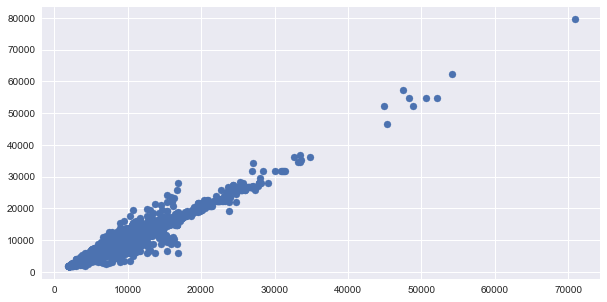

In [251]:
plt.scatter(finalpred,y)

In [252]:
X_test = test

In [255]:
type(finalpred) 

numpy.ndarray

In [219]:
test_set_predictions

array([ 13384.4409862 ,   6320.97692308,   8694.38621862, ...,
        13012.1235622 ,  10309.06471475,  10034.50495777])

In [220]:
d = {'Price': test_set_predictions.round()}
df_predictions = pd.DataFrame(data=d)
df_predictions = df_predictions['Price']

In [221]:
df_predictions.head()

0    13384.0
1     6321.0
2     8694.0
3    10128.0
4     5053.0
Name: Price, dtype: float64

In [223]:
df_predictions.to_csv('w23.csv', index=False)

In [224]:
#train.to_csv('flight_Td.csv', index=False)
#test.to_csv('flight_Ted.csv', index=False)